### https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873

### https://www.kaggle.com/code/bextuychiev/advanced-time-series-analysis-decomposition

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams["figure.figsize"] = [16,9]
from cycler import cycler
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# metrics
from sklearn.metrics import mean_absolute_error

from statsmodels.tsa.stattools import adfuller

In [338]:
df = pd.read_excel("D:\Άκης\Data_Science\Deree\ITC6002A1 - EXPLORING AND ANALYZING DATA\Final_Project\data\Gold-Historical-Prices-1-2.xlsx"
                  ,sheet_name="Gold Historical Data")

In [339]:
df = df[['Price', "Date"]]
df = df[df.Price.notna()]
df.sort_values("Date", inplace=True)
df.set_index("Date", inplace=True)
df_1980 = df[df.index.year == 1980].copy()
df_1981 = df[df.index.year == 1981].copy()

## Predict stocks for 1980 based on January

In [340]:
#//////// Checking for stationarity in df_1981 continuous series ////////

block1_contest = adfuller(df_1980['Price'], autolag="AIC", regression="nc")

print("1. ADF ", block1_contest[0])
print("1. P-value ", block1_contest[1])
print("1. Num of Lags ", block1_contest[2])
print("1. Num of observations used for ADF Regression and Critical values calculation ", block1_contest[3])
print("1. Critical values ", block1_contest[0])
for key, val in block1_contest[4].items():
    print("\t",key,": ",val)

1. ADF  -0.2111609810249445
1. P-value  0.609767076929725
1. Num of Lags  5
1. Num of observations used for ADF Regression and Critical values calculation  256
1. Critical values  -0.2111609810249445
	 1% :  -2.5745289373779294
	 5% :  -1.9420987035393715
	 10% :  -1.6158224005413055


### P-value is equal to 0.609767076929725 > 0.05, We can not reject the null hypothesis the series is not stationary

In [341]:
total_working_days = 0
for i in range(0,12):
    print("Month:", i+1,df_1980[df_1980.index.month == i+1].shape[0], "working days.")
    total_working_days =  total_working_days + df_1980[df_1980.index.month == i+1].shape[0]
print("Number of working days", total_working_days)

Month: 1 23 working days.
Month: 2 21 working days.
Month: 3 21 working days.
Month: 4 22 working days.
Month: 5 22 working days.
Month: 6 21 working days.
Month: 7 23 working days.
Month: 8 21 working days.
Month: 9 22 working days.
Month: 10 23 working days.
Month: 11 20 working days.
Month: 12 23 working days.
Number of working days 262


In [342]:
#Working days except first month 
days_to_create_index = total_working_days - df_1980[df_1980.index.month == 1].shape[0]
#Separate January of the Year
df_jan = df_1980[df_1980.index.month == 1]
df_other_months = df_1980[df_1980.index.month != 1]

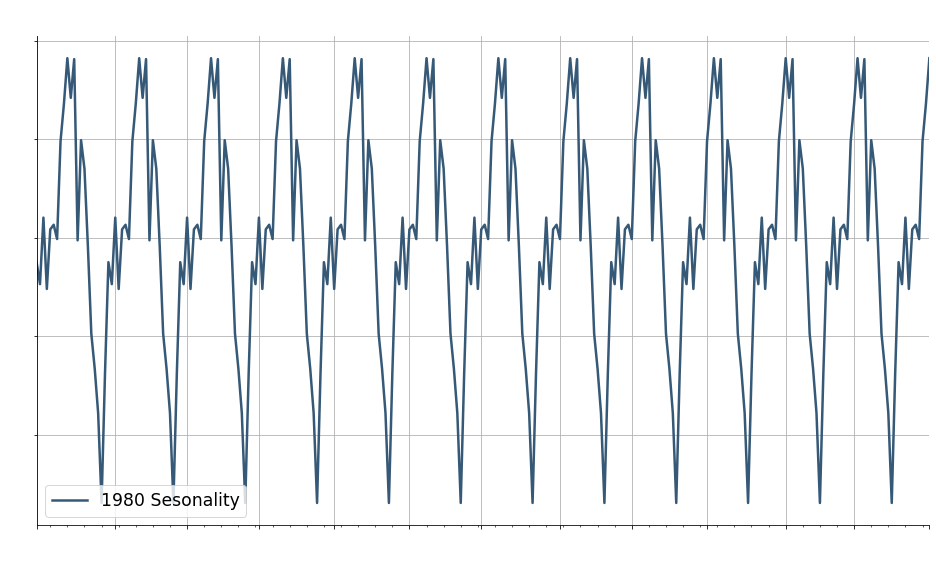

In [343]:
decompose_result = seasonal_decompose(df_1980["Price"],model='multiplicative',period=21) # "additive"
decomp_seasonality_fig = decompose_result.seasonal.plot(label='1980 Sesonality')
plt.title('Stocks dataset Sesonality', size=30, color="w")
plt.xticks(color="w")
plt.xlabel("Date",color="w")
plt.yticks(color="w")
plt.grid()
plt.legend(fontsize='xx-large')
plt.show()

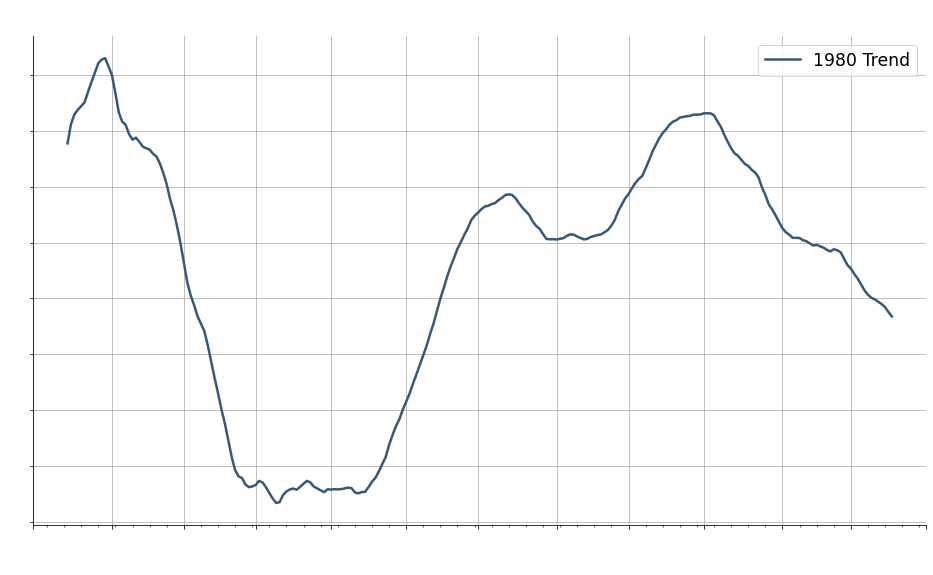

In [344]:
decompose_result = seasonal_decompose(df_1980["Price"],model="additive",period=21) # 'multiplicative'
decomp_trend_fig = decompose_result.trend.plot(label='1980 Trend')
plt.title('Stocks dataset Trend', size=30, color="w")
plt.xticks(color="w")
plt.yticks(color="w")
plt.xlabel("Date",color="w")
plt.legend(fontsize='xx-large')
plt.grid()
plt.show()

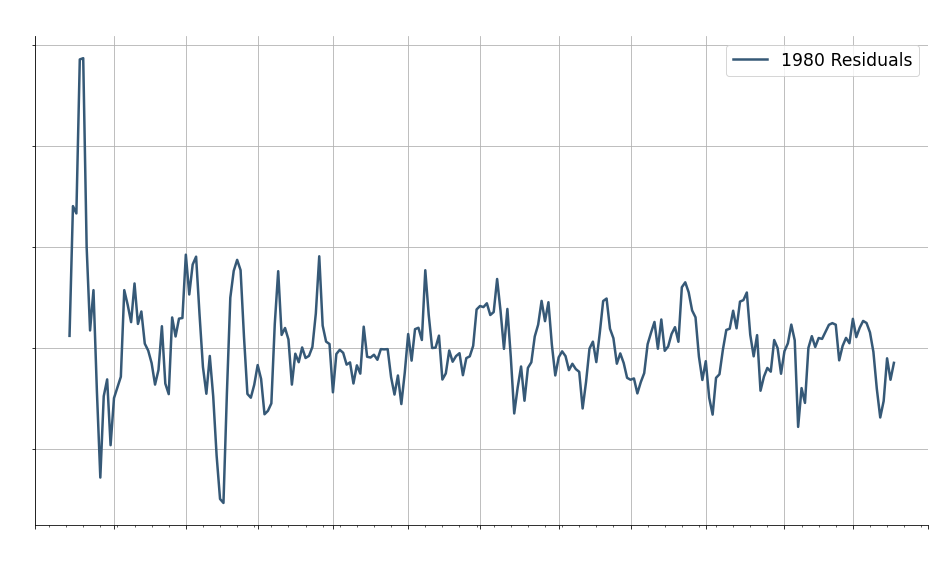

In [345]:
decompose_result = seasonal_decompose(df_1980["Price"],model="additive",period=21) # 'multiplicative'
decomp_residuals_fig = decompose_result.resid.plot(label='1980 Residuals')
plt.title('Stocks dataset Residuals', size=30, color="w")
plt.xticks(color="w")
plt.yticks(color="w")
plt.xlabel("Date",color="w")
plt.legend(fontsize='xx-large')
plt.grid()
plt.show()

In [346]:
# x = 21
# alpha = 1/(2*x)

# # Single exponential smoothing of the visitors data set
# df_1980['HWES1'] = SimpleExpSmoothing(df_1980['Price']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues      
# df_1980['HWES2_MUL'] = ExponentialSmoothing(df_1980['Price'],trend='mul').fit().fittedvalues #

# rcParams['figure.figsize'] = 18, 5
# rcParams['axes.spines.top'] = False
# rcParams['axes.spines.right'] = False
# rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
# rcParams['lines.linewidth'] = 2.5

# # Plot
# plt.figure(figsize=(25,15))
# plt.plot(df_1980["Price"], color = "blue",label='1980 Actual Values')
# plt.plot(df_1980["HWES1"], color = "green",label='SIMPLE Predictions from February till December')
# plt.plot(df_1980["HWES2_MUL"], color = "orange",label='TREND Predictions from February till December')

# plt.title('Stocks dataset', size=30, color="w")
# plt.grid()
# plt.xticks(color="w", size=20, rotation=45)
# plt.yticks(color="w", size=20)
# plt.legend(fontsize='xx-large')
# plt.show()

C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


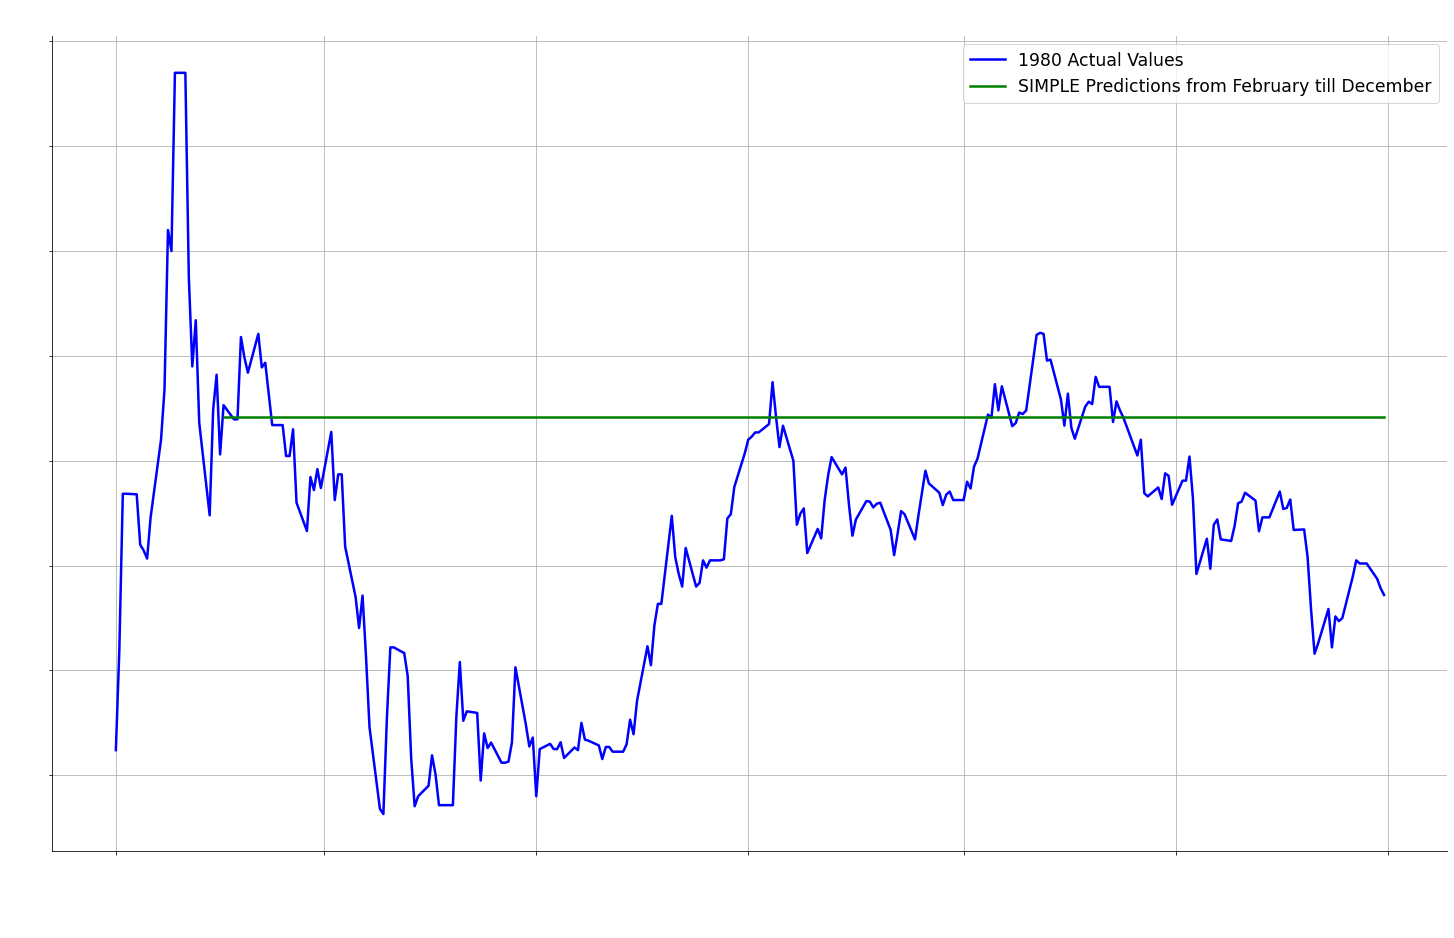

In [347]:
x = 21
alpha = 1/(2*x)
# Fit the model
SimpleExpSmoothing_model = SimpleExpSmoothing(df_jan['Price']).fit(smoothing_level=alpha)#,optimized=False,use_brute=True
test_predictions = SimpleExpSmoothing_model.forecast(len(df_other_months))
df_preds = pd.DataFrame(test_predictions, columns=["Predictions"])

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

# Plot
plt.figure(figsize=(25,15))
plt.plot(df_1980["Price"], color = "blue",label='1980 Actual Values')
plt.plot(df_preds["Predictions"], color = "green",label='SIMPLE Predictions from February till December')

plt.title('Stocks dataset', size=30, color="w")
plt.grid()
plt.xticks(color="w", size=20, rotation=45)
plt.yticks(color="w", size=20)
plt.legend(fontsize='xx-large')
plt.show()

In [349]:
mse = mean_absolute_error(df_other_months["Price"],df_preds["Predictions"])
rmse = np.sqrt(mse)
print(mse)
print(rmse)

67.87998678500067
8.238931167633377


C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


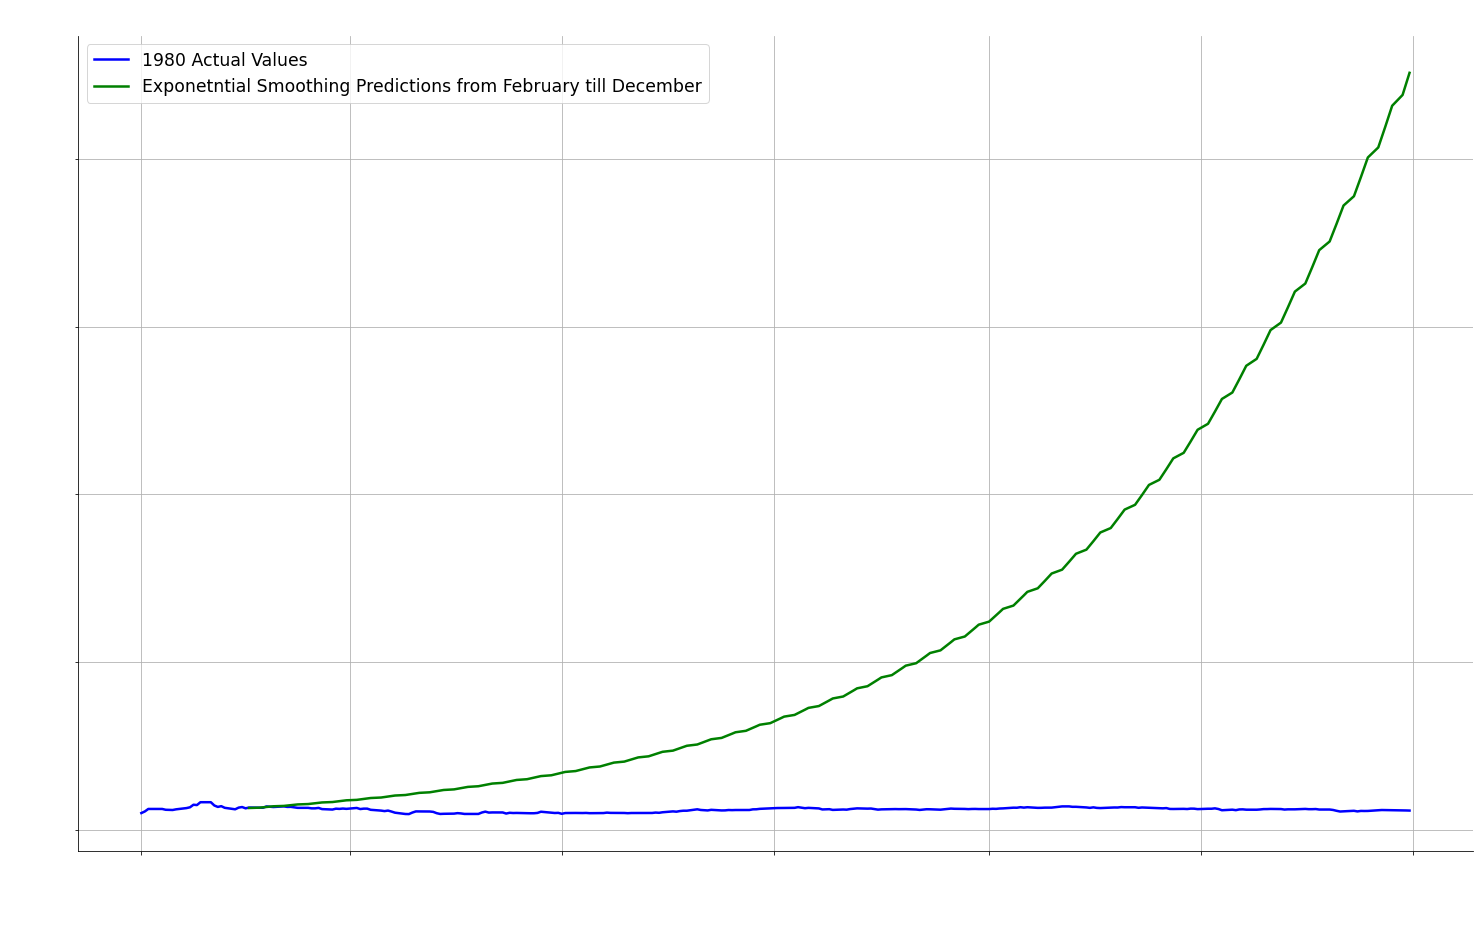

In [359]:
# Fit the model
ExponentialSmoothing_model = ExponentialSmoothing(df_jan['Price'],trend='mul').fit()#,trend='mul',seasonal='mul',seasonal_periods=21
test_predictions = ExponentialSmoothing_model.forecast(len(df_other_months))
df_preds = pd.DataFrame(test_predictions, columns=["Predictions"])

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

# Plot
plt.figure(figsize=(25,15))
plt.plot(df_1980["Price"], color = "blue",label='1980 Actual Values')
plt.plot(df_preds["Predictions"], color = "green",label='Exponetntial Smoothing Predictions from February till December')

plt.title('Stocks dataset', size=30, color="w")
plt.grid()
plt.xticks(color="w", size=20, rotation=45)
plt.yticks(color="w", size=20)
plt.legend(fontsize='xx-large')
plt.show()

In [360]:
mse = mean_absolute_error(df_other_months["Price"],df_preds["Predictions"])
rmse = np.sqrt(mse)
print(mse)
print(rmse)

5622.133089370434
74.98088482653719


C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


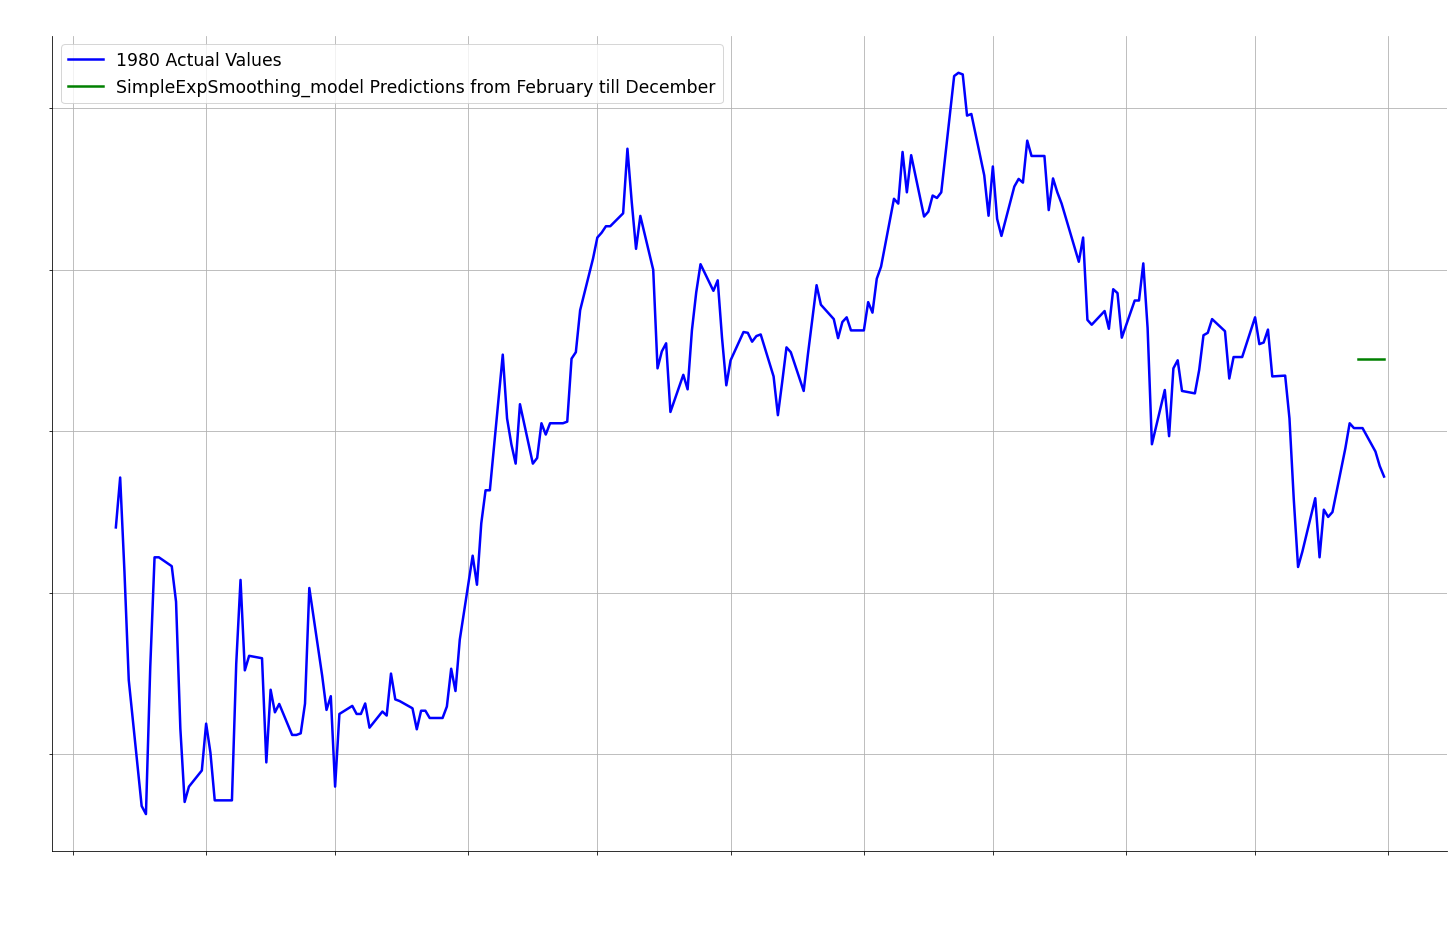

In [361]:
# Split into train and test set
train_visitors = df_1980[:257]
test_visitors = df_1980[257:]
# Fit the model
SimpleExpSmoothing_model = SimpleExpSmoothing(train_visitors['Price']).fit(smoothing_level=alpha)#,optimized=False,use_brute=True
test_predictions = SimpleExpSmoothing_model.forecast(len(test_visitors))
df_preds = pd.DataFrame(test_predictions, columns=["Predictions"])

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

# Plot
plt.figure(figsize=(25,15))
plt.plot(df_1980["Price"][50:], color = "blue",label='1980 Actual Values')
plt.plot(df_preds["Predictions"], color = "green",label='SimpleExpSmoothing_model Predictions from February till December')

plt.title('Stocks dataset', size=30, color="w")
plt.grid()
plt.xticks(color="w", size=20, rotation=45)
plt.yticks(color="w", size=20)
plt.legend(fontsize='xx-large')
plt.show()

In [362]:
mse = mean_absolute_error(test_visitors["Price"],df_preds["Predictions"])
rmse = np.sqrt(mse)
print(mse)
print(rmse)

28.21560581134388
5.3118363878553225


C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


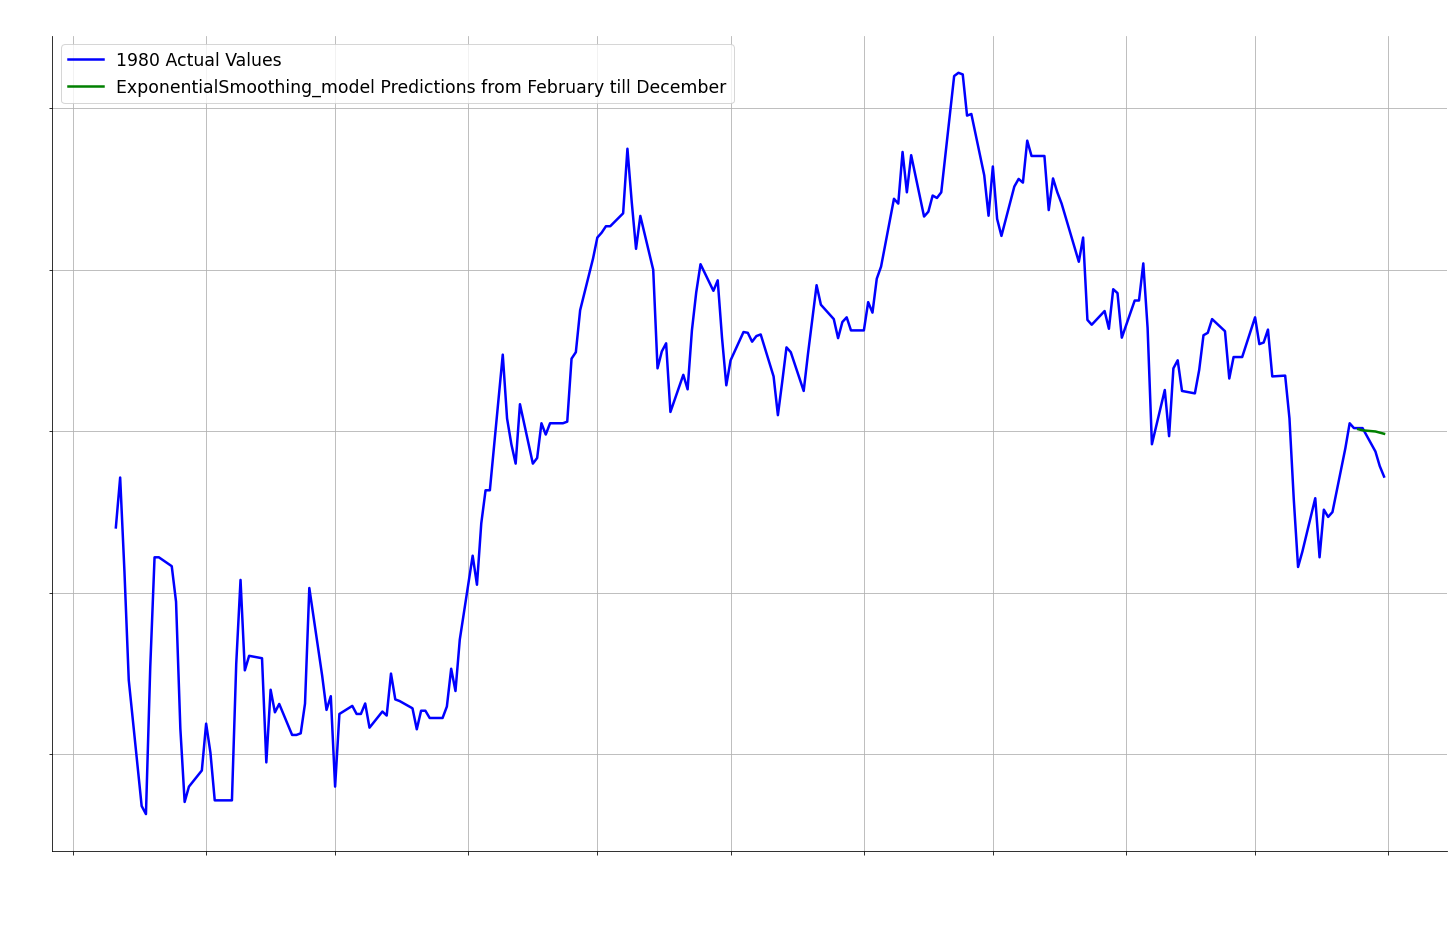

In [363]:
ExponentialSmoothing_model = ExponentialSmoothing(train_visitors['Price'],trend='mul').fit() #,seasonal_periods=21,,seasonal='mul'
test_predictions = ExponentialSmoothing_model.forecast(len(test_visitors))
df_preds = pd.DataFrame(test_predictions, columns=["Predictions"])

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

# Plot
plt.figure(figsize=(25,15))
plt.plot(df_1980["Price"][50:], color = "blue",label='1980 Actual Values')
plt.plot(df_preds["Predictions"], color = "green",label='ExponentialSmoothing_model Predictions from February till December')

plt.title('Stocks dataset', size=30, color="w")
plt.grid()
plt.xticks(color="w", size=20, rotation=45)
plt.yticks(color="w", size=20)
plt.legend(fontsize='xx-large')
plt.show()

In [364]:
mse = mean_absolute_error(test_visitors["Price"],df_preds["Predictions"])
rmse = np.sqrt(mse)
print(mse)
print(rmse)

6.167118694435862
2.4833684169763983


## Predict stocks for 1981 based on January

In [365]:
#//////// Checking for stationarity in df_1981 continuous series ////////

block1_contest = adfuller(df_1981['Price'], autolag="AIC", regression="nc")

print("1. ADF ", block1_contest[0])
print("1. P-value ", block1_contest[1])
print("1. Num of Lags ", block1_contest[2])
print("1. Num of observations used for ADF Regression and Critical values calculation ", block1_contest[3])
print("1. Critical values ", block1_contest[0])
for key, val in block1_contest[4].items():
    print("\t",key,": ",val)

1. ADF  -1.8595044628113697
1. P-value  0.05998120911267689
1. Num of Lags  1
1. Num of observations used for ADF Regression and Critical values calculation  259
1. Critical values  -1.8595044628113697
	 1% :  -2.574426501393837
	 5% :  -1.9420854317597598
	 10% :  -1.6158335160402806


### P-value is equal to 0.05998120911267689 > 0.05, We can not reject the null hypothesis the series is not stationary

In [366]:
total_working_days = 0
for i in range(0,12):
    print("Month:", i+1,df_1981[df_1981.index.month == i+1].shape[0], "working days.")
    total_working_days =  total_working_days + df_1981[df_1981.index.month == i+1].shape[0]
print("Number of working days", total_working_days)

Month: 1 22 working days.
Month: 2 20 working days.
Month: 3 22 working days.
Month: 4 22 working days.
Month: 5 21 working days.
Month: 6 22 working days.
Month: 7 23 working days.
Month: 8 21 working days.
Month: 9 22 working days.
Month: 10 22 working days.
Month: 11 21 working days.
Month: 12 23 working days.
Number of working days 261


In [367]:
#Working days except first month 
days_to_create_index = total_working_days - df_1981[df_1981.index.month == 1].shape[0]
#Separate January of the Year
df_jan = df_1981[df_1981.index.month == 1]
df_other_months = df_1981[df_1981.index.month != 1]

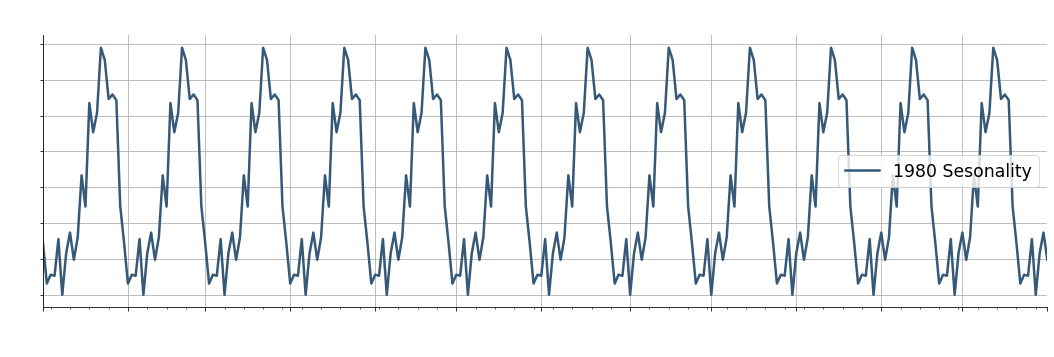

In [368]:
decompose_result = seasonal_decompose(df_1981["Price"],model='multiplicative',period=21) # "additive"
decomp_seasonality_fig = decompose_result.seasonal.plot(label='1980 Sesonality')
plt.title('Stocks dataset Sesonality', size=30, color="w")
plt.xticks(color="w")
plt.xlabel("Date",color="w")
plt.yticks(color="w")
plt.grid()
plt.legend(fontsize='xx-large')
plt.show()

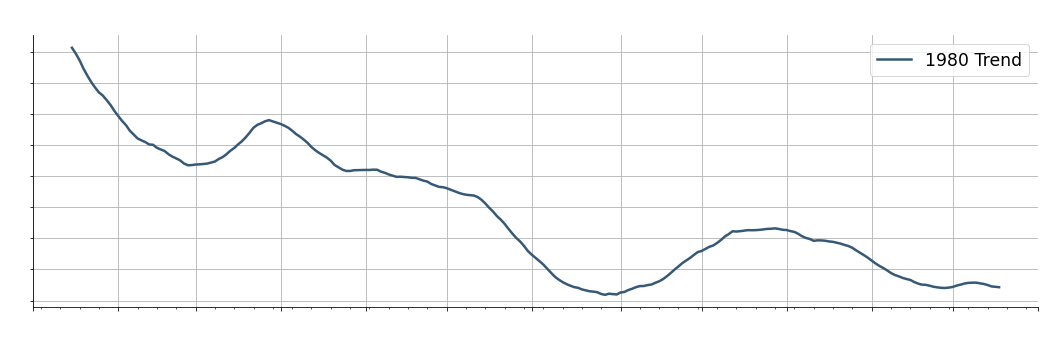

In [369]:
decompose_result = seasonal_decompose(df_1981["Price"],model="additive",period=21) # 'multiplicative'
decomp_trend_fig = decompose_result.trend.plot(label='1980 Trend')
plt.title('Stocks dataset Trend', size=30, color="w")
plt.xticks(color="w")
plt.yticks(color="w")
plt.xlabel("Date",color="w")
plt.legend(fontsize='xx-large')
plt.grid()
plt.show()

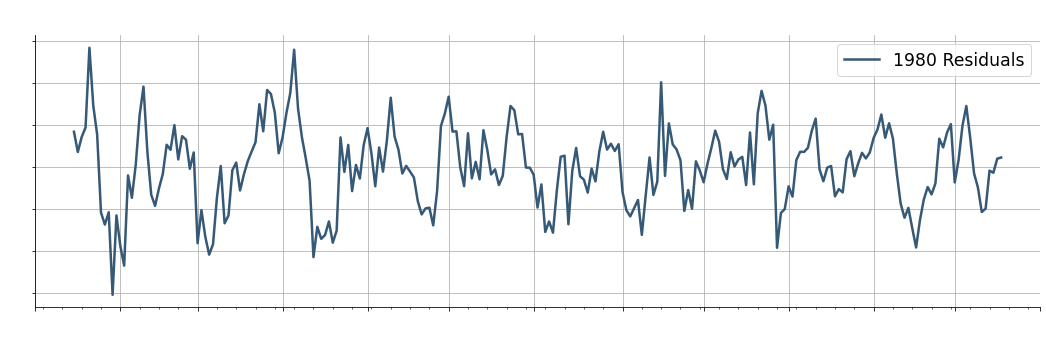

In [370]:
decompose_result = seasonal_decompose(df_1981["Price"],model="additive",period=21) # 'multiplicative'
decomp_residuals_fig = decompose_result.resid.plot(label='1980 Residuals')
plt.title('Stocks dataset Residuals', size=30, color="w")
plt.xticks(color="w")
plt.yticks(color="w")
plt.xlabel("Date",color="w")
plt.legend(fontsize='xx-large')
plt.grid()
plt.show()

In [371]:
# x = 21
# alpha = 1/(2*x)

# # Single exponential smoothing of the visitors data set
# df_1981['HWES1'] = SimpleExpSmoothing(df_1981['Price']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues      
# df_1981['HWES2_MUL'] = ExponentialSmoothing(df_1981['Price'],trend='mul').fit().fittedvalues #

# rcParams['figure.figsize'] = 18, 5
# rcParams['axes.spines.top'] = False
# rcParams['axes.spines.right'] = False
# rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
# rcParams['lines.linewidth'] = 2.5

# # Plot
# plt.figure(figsize=(25,15))
# plt.plot(df_1981["Price"], color = "blue",label='1981 Actual Values')
# plt.plot(df_1981["HWES1"], color = "green",label='SIMPLE Predictions from February till December')
# plt.plot(df_1981["HWES2_MUL"], color = "orange",label='TREND Predictions from February till December')

# plt.title('Stocks dataset', size=30, color="w")
# plt.grid()
# plt.xticks(color="w", size=20, rotation=45)
# plt.yticks(color="w", size=20)
# plt.legend(fontsize='xx-large')
# plt.show()

C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


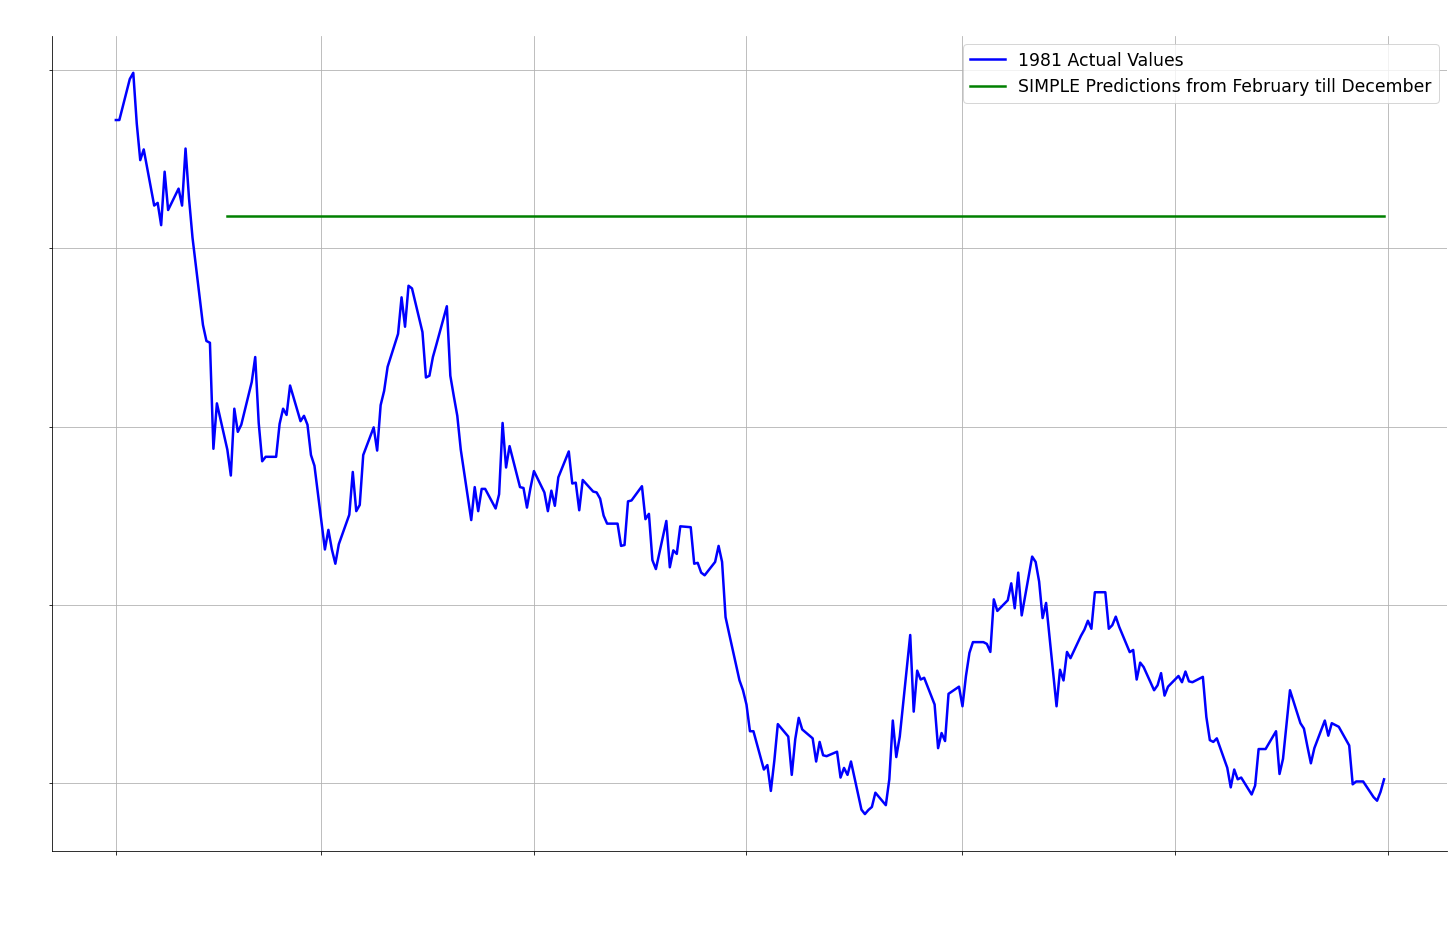

In [372]:
x = 21
alpha = 1/(2*x)
# Fit the model
SimpleExpSmoothing_model = SimpleExpSmoothing(df_jan['Price']).fit(smoothing_level=alpha)#,optimized=False,use_brute=True
test_predictions = SimpleExpSmoothing_model.forecast(len(df_other_months))
df_preds = pd.DataFrame(test_predictions, columns=["Predictions"])

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

# Plot
plt.figure(figsize=(25,15))
plt.plot(df_1981["Price"], color = "blue",label='1981 Actual Values')
plt.plot(df_preds["Predictions"], color = "green",label='SIMPLE Predictions from February till December')

plt.title('Stocks dataset', size=30, color="w")
plt.grid()
plt.xticks(color="w", size=20, rotation=45)
plt.yticks(color="w", size=20)
plt.legend(fontsize='xx-large')
plt.show()

In [373]:
mse = mean_absolute_error(df_other_months["Price"],df_preds["Predictions"])
rmse = np.sqrt(mse)
print(mse)
print(rmse)

108.79485668338178
10.430477298924618


C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


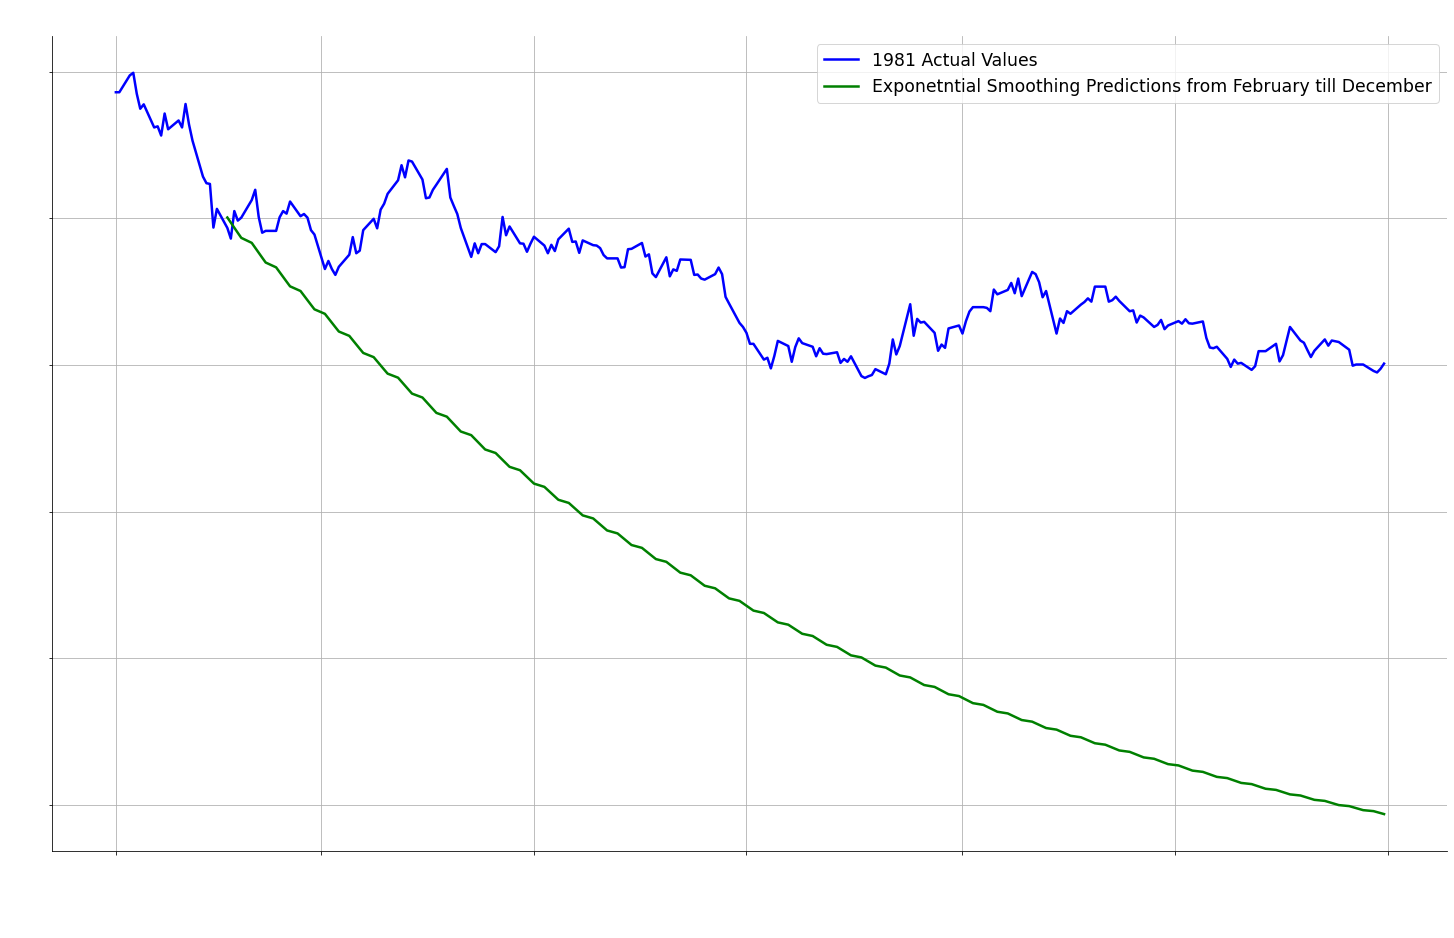

In [374]:
# Fit the model
ExponentialSmoothing_model = ExponentialSmoothing(df_jan['Price'],trend='mul').fit()#,trend='mul',seasonal='mul',seasonal_periods=21
test_predictions = ExponentialSmoothing_model.forecast(len(df_other_months))
df_preds = pd.DataFrame(test_predictions, columns=["Predictions"])

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

# Plot
plt.figure(figsize=(25,15))
plt.plot(df_1981["Price"], color = "blue",label='1981 Actual Values')
plt.plot(df_preds["Predictions"], color = "green",label='Exponetntial Smoothing Predictions from February till December')

plt.title('Stocks dataset', size=30, color="w")
plt.grid()
plt.xticks(color="w", size=20, rotation=45)
plt.yticks(color="w", size=20)
plt.legend(fontsize='xx-large')
plt.show()

In [375]:
mse = mean_absolute_error(df_other_months["Price"],df_preds["Predictions"])
rmse = np.sqrt(mse)
print(mse)
print(rmse)

207.02774130085976
14.388458614488897


C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


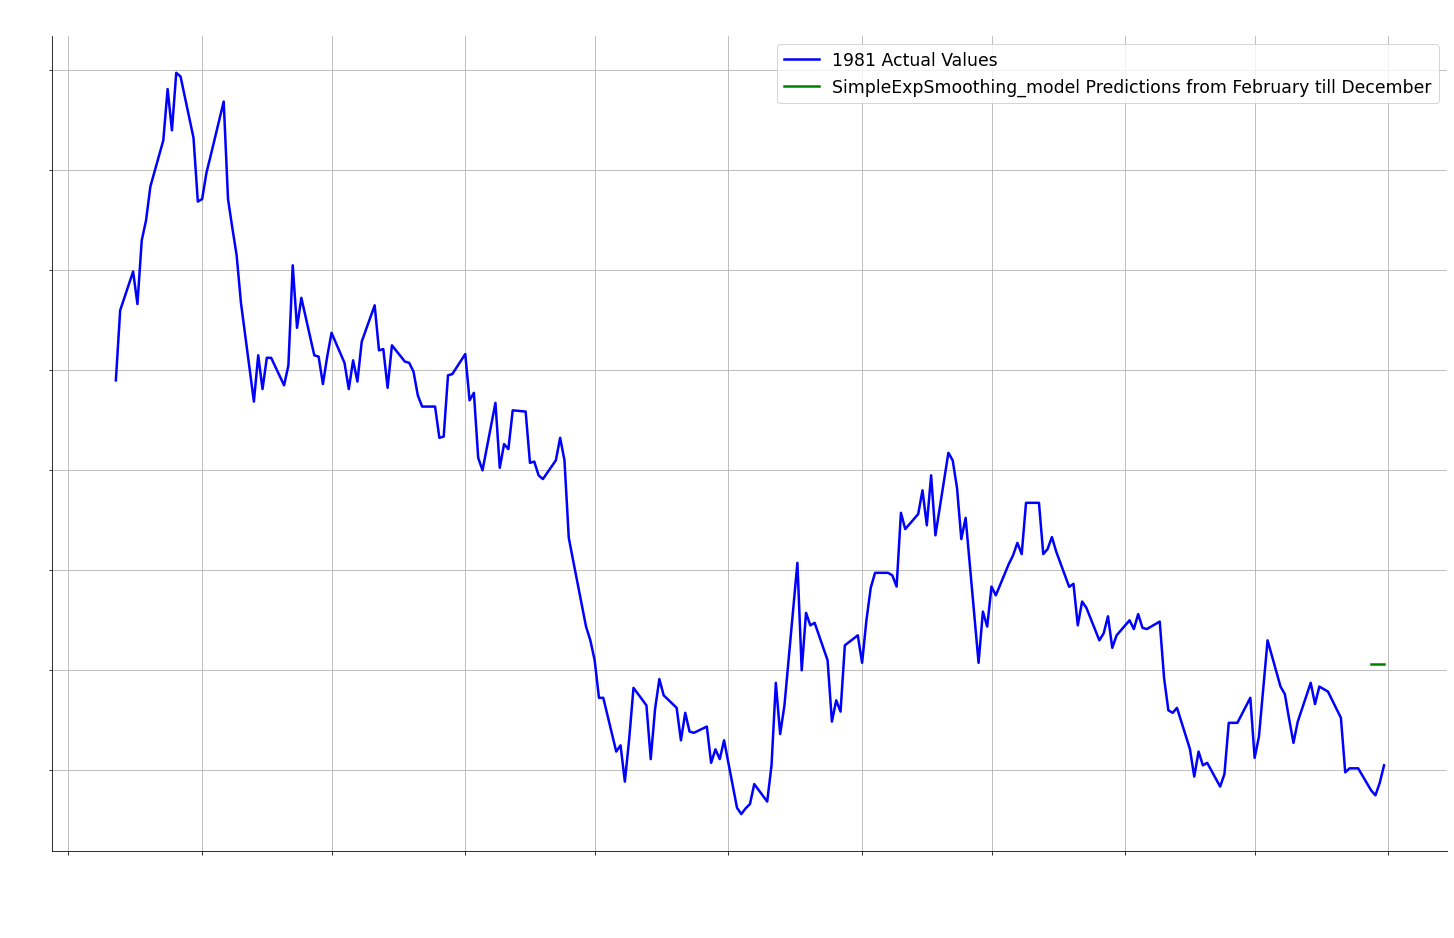

In [376]:
# Split into train and test set
train_visitors = df_1981[:257]
test_visitors = df_1981[257:]
# Fit the model
SimpleExpSmoothing_model = SimpleExpSmoothing(train_visitors['Price']).fit(smoothing_level=alpha)#,optimized=False,use_brute=True
test_predictions = SimpleExpSmoothing_model.forecast(len(test_visitors))
df_preds = pd.DataFrame(test_predictions, columns=["Predictions"])

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

# Plot
plt.figure(figsize=(25,15))
plt.plot(df_1981["Price"][50:], color = "blue",label='1981 Actual Values')
plt.plot(df_preds["Predictions"], color = "green",label='SimpleExpSmoothing_model Predictions from February till December')

plt.title('Stocks dataset', size=30, color="w")
plt.grid()
plt.xticks(color="w", size=20, rotation=45)
plt.yticks(color="w", size=20)
plt.legend(fontsize='xx-large')
plt.show()

In [377]:
mse = mean_absolute_error(test_visitors["Price"],df_preds["Predictions"])
rmse = np.sqrt(mse)
print(mse)
print(rmse)

23.936395386651157
4.892483560182002


C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


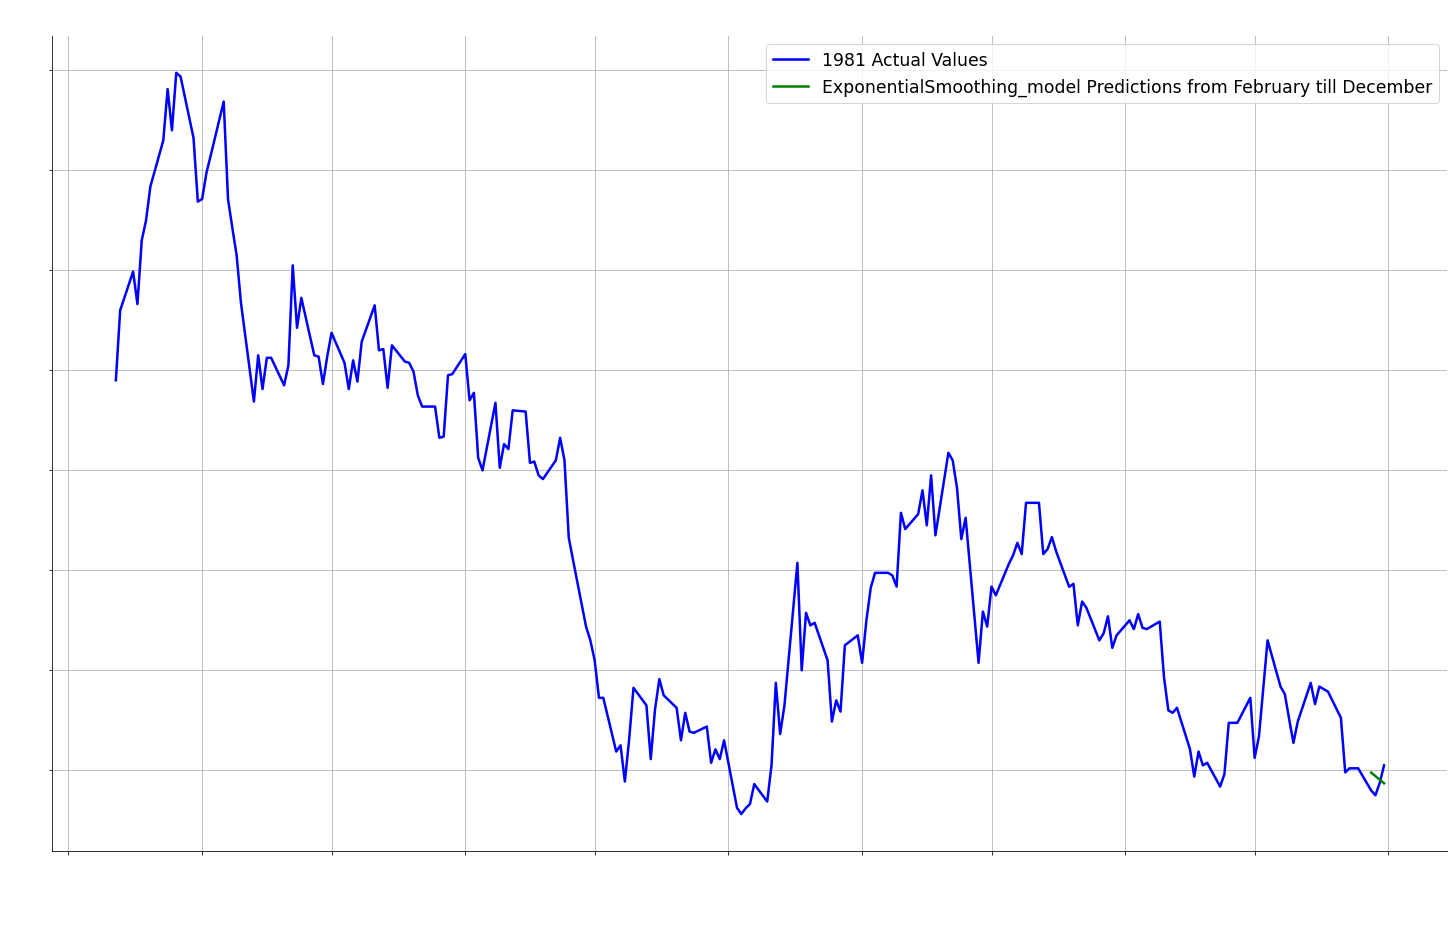

In [378]:
ExponentialSmoothing_model = ExponentialSmoothing(train_visitors['Price'],trend='mul').fit() #,seasonal_periods=21,,seasonal='mul'
test_predictions = ExponentialSmoothing_model.forecast(len(test_visitors))
df_preds = pd.DataFrame(test_predictions, columns=["Predictions"])

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

# Plot
plt.figure(figsize=(25,15))
plt.plot(df_1981["Price"][50:], color = "blue",label='1981 Actual Values')
plt.plot(df_preds["Predictions"], color = "green",label='ExponentialSmoothing_model Predictions from February till December')

plt.title('Stocks dataset', size=30, color="w")
plt.grid()
plt.xticks(color="w", size=20, rotation=45)
plt.yticks(color="w", size=20)
plt.legend(fontsize='xx-large')
plt.show()

In [379]:
mse = mean_absolute_error(test_visitors["Price"],df_preds["Predictions"])
rmse = np.sqrt(mse)
print(mse)
print(rmse)

2.9008735588867722
1.7031951030010544
